In [2]:
#Import the Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
#Loading Data

In [5]:
df = pd.read_csv('heart.data.csv')
df.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [6]:
df['Sex'].replace(['M','F'],[0,1],inplace=True)
df['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)
df['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace=True)
df['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
df['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)

In [7]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,1,130,236,0,2,174,0,0.0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [9]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,1,130,236,0,2,174,0,0.0,1,1


In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<Axes: xlabel='HeartDisease', ylabel='count'>

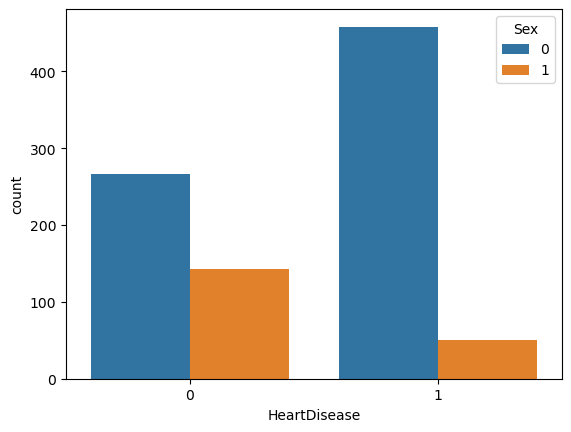

In [11]:
sns.countplot(data=df,x='HeartDisease',hue='Sex')

C:\Users\abhay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


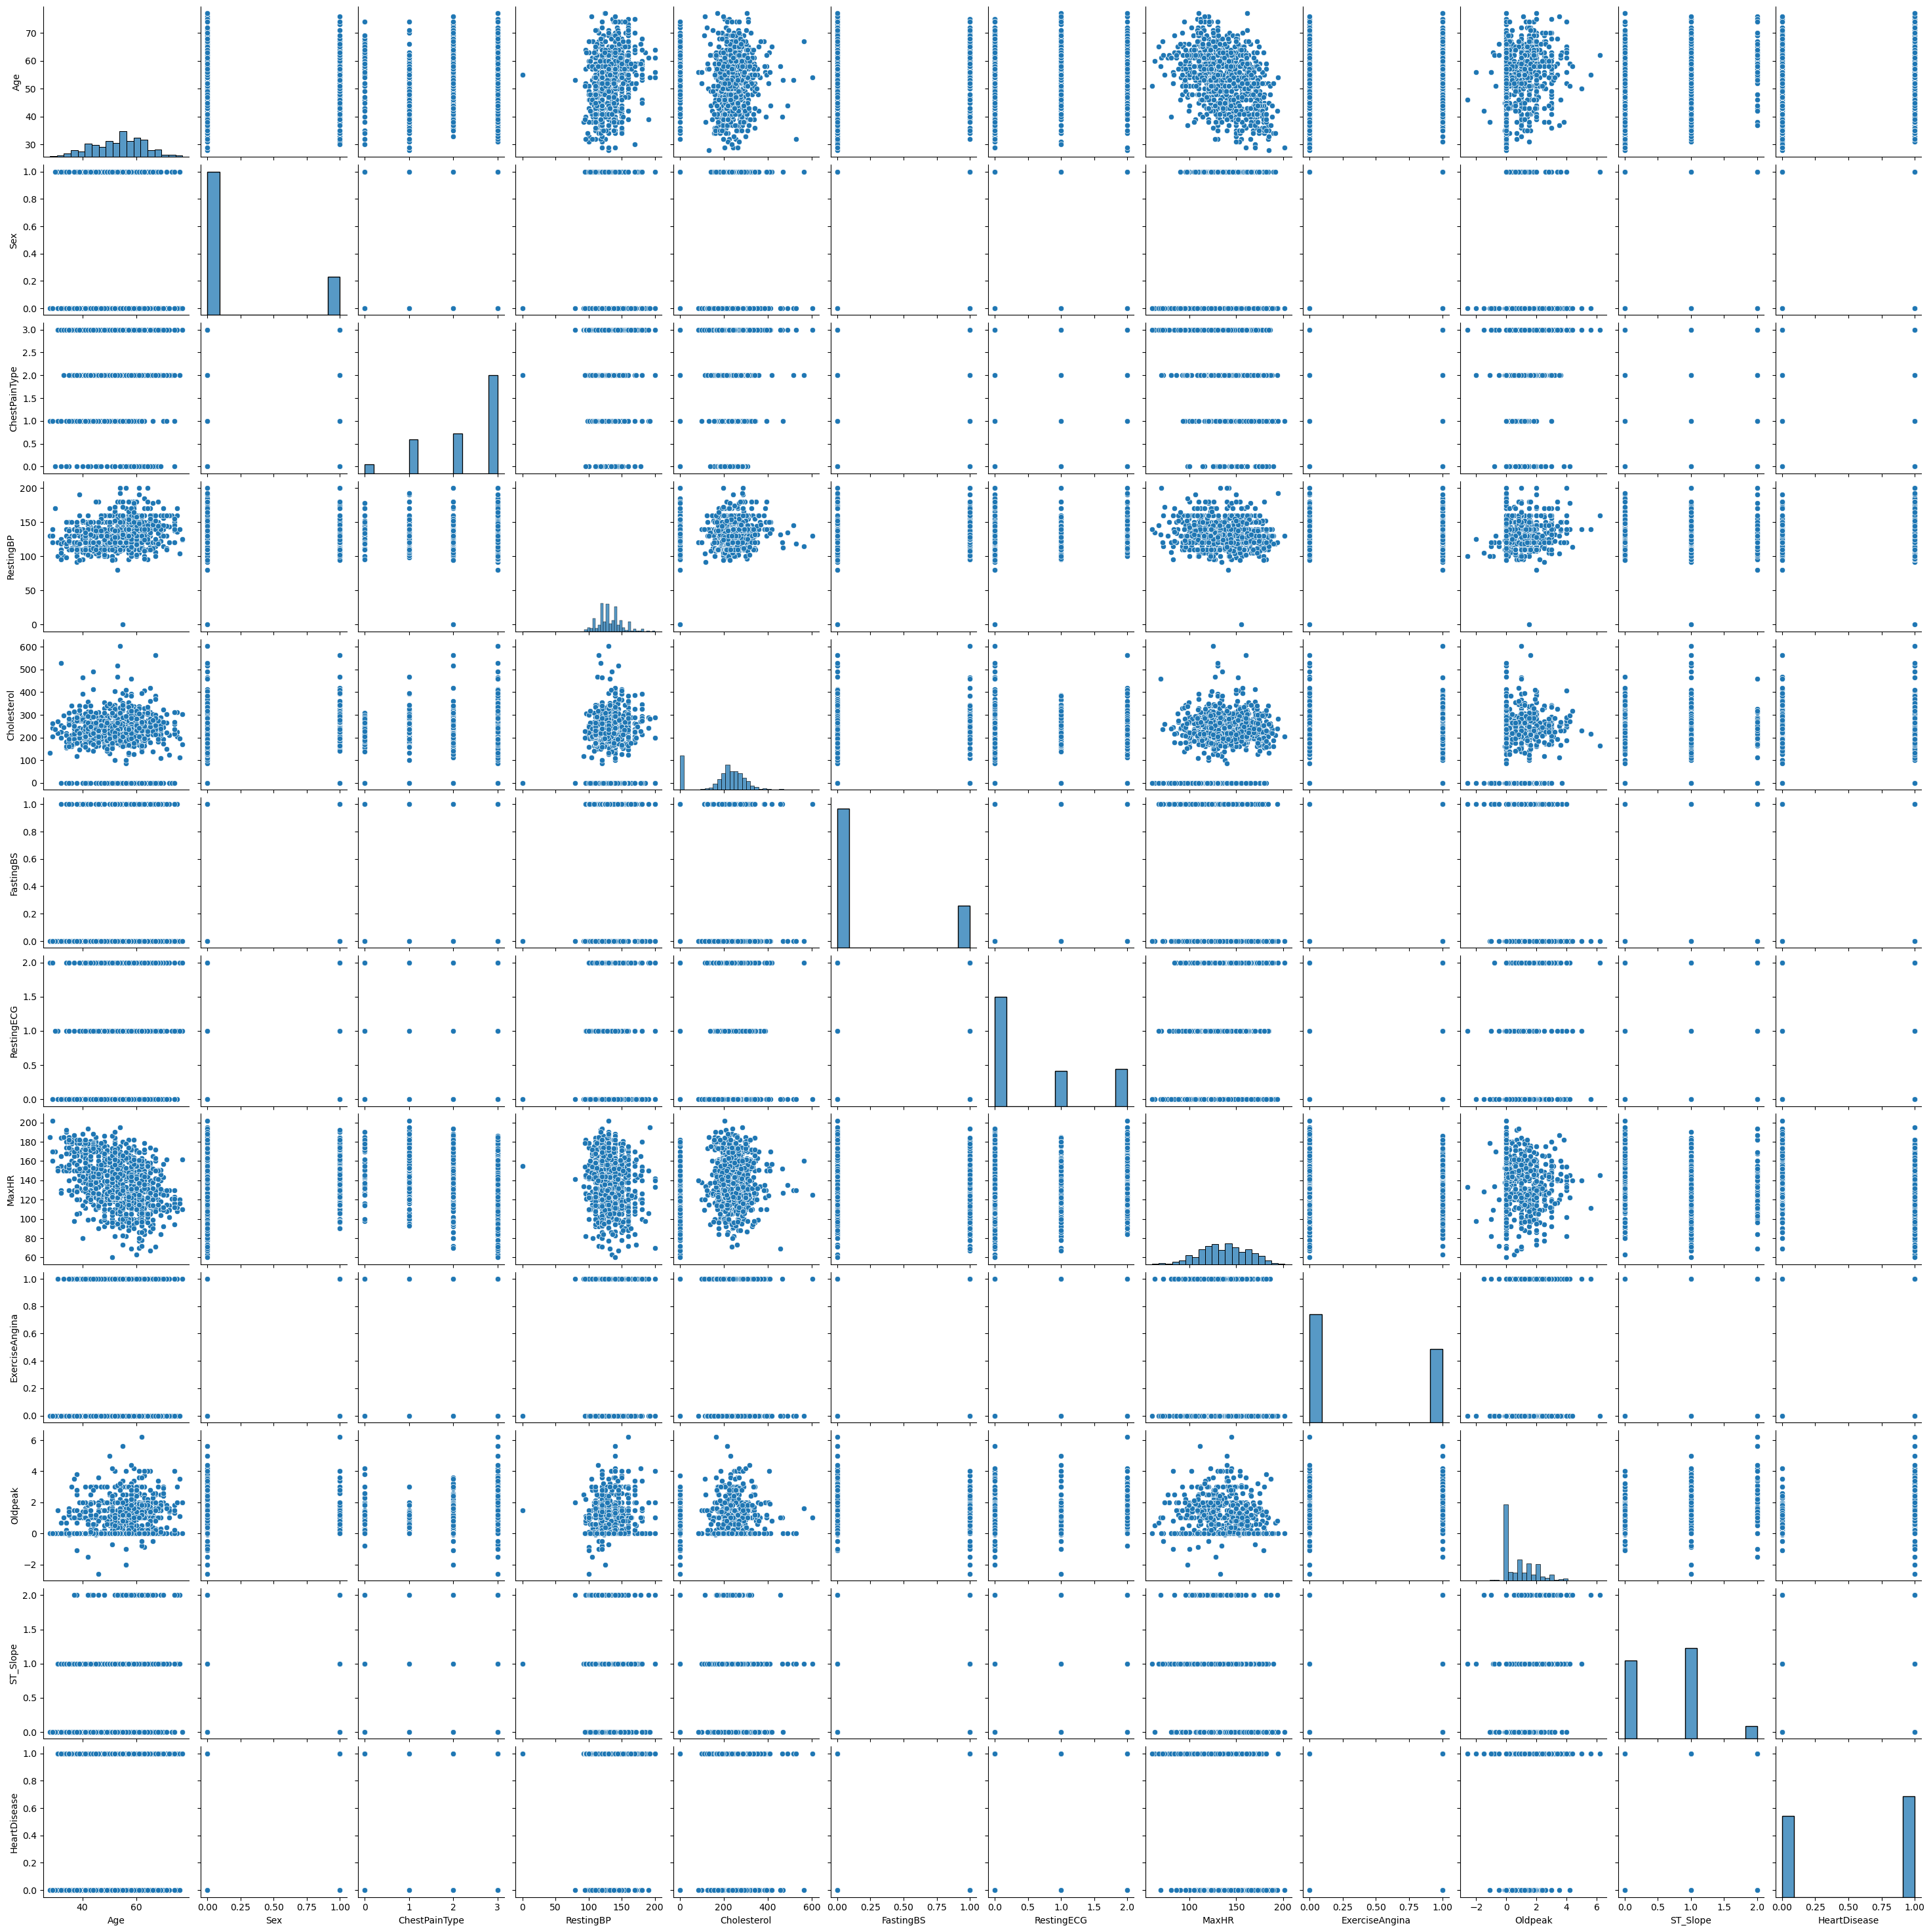

In [12]:
sns.pairplot(data=df)

C:\Users\abhay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


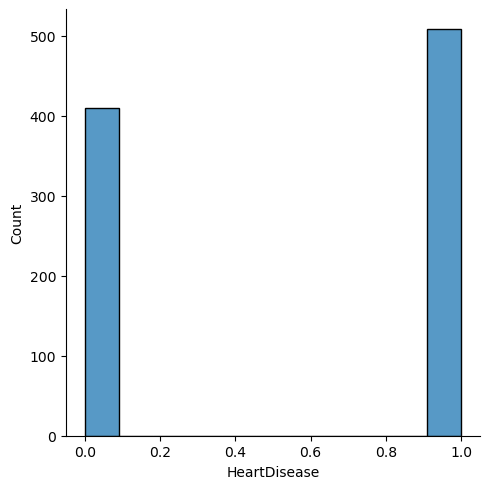

In [13]:
sns.displot(df['HeartDisease'])

In [14]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex,-0.055750,1.000000,-0.168254,-0.005133,0.200092,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.150693,-0.305445
ChestPainType,0.165896,-0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317480,0.471354
RestingBP,0.254399,-0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,0.075162,0.107589
Cholesterol,-0.095282,0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,-0.111471,-0.232741
FastingBS,0.198039,-0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


<Axes: >

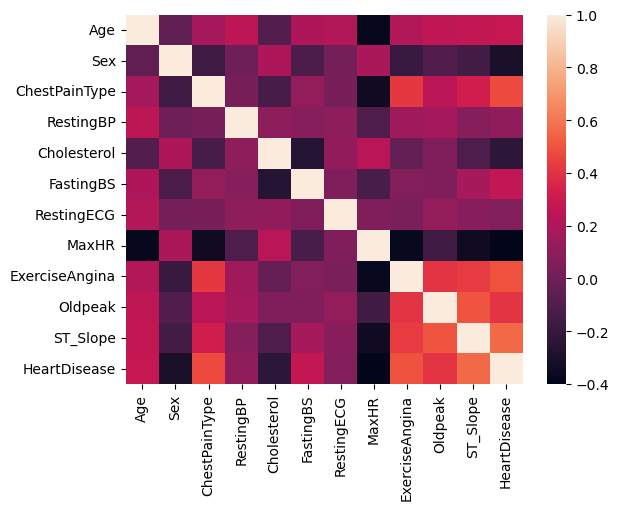

In [15]:
sns.heatmap(df.corr())

In [16]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [17]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

In [18]:
y =  df[['HeartDisease']]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
print(lm.intercept_)

[0.26295863]


In [25]:
n=lm.coef_
n.shape
n = n.reshape(11,1)

In [26]:
X_train.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [27]:
cdf= pd.DataFrame(n,X.columns,columns=['coeff'])

In [28]:
cdf

,coeff
Age,0.000655
Sex,-0.161669
ChestPainType,0.085248
RestingBP,0.000518
Cholesterol,-0.000498
FastingBS,0.111106
RestingECG,0.005031
MaxHR,-0.001475
ExerciseAngina,0.178671
Oldpeak,0.051060


In [29]:
prediction = lm.predict(X_test)

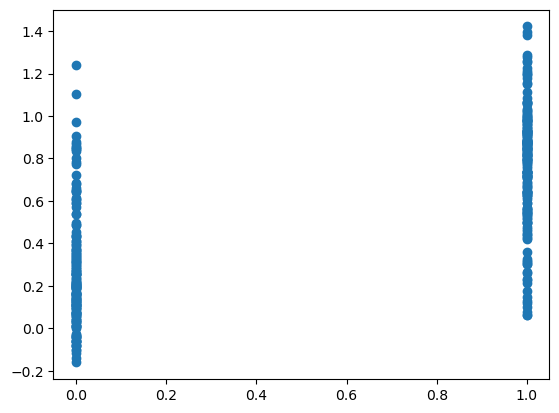

In [30]:
plt.scatter(y_test,prediction)

In [31]:
from sklearn import metrics

In [32]:
metrics.mean_absolute_error(y_test,prediction)

0.2803447743428608

In [33]:
metrics.mean_squared_error(y_test,prediction)

0.13551274003931849

In [34]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

0.368120550960305